In [1]:

import kagglehub
path = kagglehub.dataset_download("ianktoo/simulated-roads-accident-data")

c:\Users\Saviru Mendis\anaconda3\envs\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import os

df1 = pd.read_csv(os.path.join(path, "synthetic_road_accidents_2k.csv"))
df2 = pd.read_csv(os.path.join(path, "synthetic_road_accidents_10k.csv"))
df3 = pd.read_csv(os.path.join(path, "synthetic_road_accidents_100k.csv"))


In [4]:
_df = pd.concat([df1, df2, df3])
print(_df.shape)

(112000, 13)


In [5]:
#Final combined dataframe
_df = _df.drop_duplicates()
print(f"Number of duplicates after removal: {_df.duplicated().sum()}")
print(f"Shape of the df after removal: {_df.shape}")


Number of duplicates after removal: 0
Shape of the df after removal: (111961, 13)


In [6]:
#final_df with corrected column indexes.
_df.reset_index(drop = True, inplace = True)
print(_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111961 entries, 0 to 111960
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               111961 non-null  object 
 1   num_lanes               111961 non-null  int64  
 2   curvature               111961 non-null  float64
 3   speed_limit             111961 non-null  int64  
 4   lighting                111961 non-null  object 
 5   weather                 111961 non-null  object 
 6   road_signs_present      111961 non-null  bool   
 7   public_road             111961 non-null  bool   
 8   time_of_day             111961 non-null  object 
 9   holiday                 111961 non-null  bool   
 10  school_season           111961 non-null  bool   
 11  num_reported_accidents  111961 non-null  int64  
 12  accident_risk           111961 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 8.1+ MB
None


In [7]:
_df_copy = _df.copy()

In [9]:

X = _df_copy.drop(["accident_risk","num_reported_accidents"], axis = 1)
y = _df_copy["accident_risk"]

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
f_df = pd.concat([X_train, y_train], axis = 1)
print(f_df.shape)

(78372, 12)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [12]:
df_train = f_df.copy()

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78372 entries, 80965 to 15795
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   road_type           78372 non-null  object 
 1   num_lanes           78372 non-null  int64  
 2   curvature           78372 non-null  float64
 3   speed_limit         78372 non-null  int64  
 4   lighting            78372 non-null  object 
 5   weather             78372 non-null  object 
 6   road_signs_present  78372 non-null  bool   
 7   public_road         78372 non-null  bool   
 8   time_of_day         78372 non-null  object 
 9   holiday             78372 non-null  bool   
 10  school_season       78372 non-null  bool   
 11  accident_risk       78372 non-null  float64
dtypes: bool(4), float64(2), int64(2), object(4)
memory usage: 5.7+ MB


In [14]:
cat_cols = X.select_dtypes(include = ["object","category"]).columns
num_cols = X.select_dtypes(exclude = ["object","category","bool"]).columns
bool_cols = X.select_dtypes(include = "bool").columns
num_cols, cat_cols, bool_cols

(Index(['num_lanes', 'curvature', 'speed_limit'], dtype='object'),
 Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object'),
 Index(['road_signs_present', 'public_road', 'holiday', 'school_season'], dtype='object'))

In [15]:
X_train["high_speed"] = (X_train["speed_limit"] > 45).astype(bool)

In [16]:
X_test["high_speed"] = (X_test["speed_limit"] > 45).astype(bool)

In [17]:
X_train = X_train.drop("speed_limit", axis = 1)

In [18]:
X_test = X_test.drop("speed_limit", axis = 1)

In [19]:
X_train.head(20)

,road_type,num_lanes,curvature,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,high_speed
80965,rural,2,0.69,daylight,clear,True,True,afternoon,False,True,False
73776,urban,1,0.97,night,clear,False,True,morning,False,True,False
22848,highway,3,0.31,dim,foggy,False,True,morning,True,False,False
31456,highway,3,0.74,night,clear,True,False,afternoon,True,False,False
19772,urban,3,0.86,daylight,rainy,True,False,afternoon,True,False,True
77587,urban,3,0.57,night,rainy,False,True,morning,True,False,False
64063,urban,3,0.95,dim,rainy,False,False,morning,True,True,True
66122,urban,2,0.97,dim,rainy,False,True,afternoon,True,True,True
92821,highway,2,0.48,daylight,foggy,False,True,afternoon,True,False,False
32240,urban,3,0.80,dim,rainy,False,True,evening,False,True,False


In [20]:
X_test.head(10)

,road_type,num_lanes,curvature,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,high_speed
33810,rural,2,0.12,daylight,foggy,True,False,evening,True,False,False
3113,rural,3,0.43,daylight,foggy,True,True,afternoon,False,True,False
94163,urban,3,0.57,dim,clear,True,True,afternoon,False,False,True
73431,highway,1,0.94,daylight,rainy,True,False,afternoon,True,False,True
59343,rural,4,0.77,daylight,clear,True,False,morning,True,False,True
66687,highway,2,0.75,daylight,clear,False,True,morning,True,False,False
63834,urban,1,0.24,daylight,rainy,True,True,morning,False,False,False
46956,urban,4,0.36,dim,rainy,True,False,evening,True,False,False
48891,rural,3,0.12,dim,foggy,False,True,morning,False,False,True
48076,highway,2,0.26,daylight,clear,True,False,afternoon,False,False,False


In [23]:
X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=False)

# Define the columns to drop based on the requested reference categories
drop_cols = [
    'road_type_urban',
    'lighting_daylight',
    'weather_clear',
    'road_signs_present_True',
    'public_road_True',
    'time_of_day_morning',
    'holiday_False',
    'school_season_True',
    'high_speed_False'
]

# Drop the specified reference categories from both train and test sets
X_train_enc = X_train_enc.drop(columns=[col for col in drop_cols if col in X_train_enc.columns])
X_test_enc = X_test_enc.drop(columns=[col for col in drop_cols if col in X_test_enc.columns])

X_train_enc, X_test_enc = X_train_enc.align(
    X_test_enc,
    join="left",  # keep all columns from X_train
    axis=1,
    fill_value=0  # missing columns in X_test → fill with 0
)


In [ ]:
X_train_enc.head(10)

,num_lanes,curvature,road_signs_present,public_road,holiday,school_season,high_speed,road_type_highway,road_type_rural,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening
80965,2,0.69,True,True,False,True,False,False,True,False,False,False,False,True,False
73776,1,0.97,False,True,False,True,False,False,False,False,True,False,False,False,False
22848,3,0.31,False,True,True,False,False,True,False,True,False,True,False,False,False
31456,3,0.74,True,False,True,False,False,True,False,False,True,False,False,True,False
19772,3,0.86,True,False,True,False,True,False,False,False,False,False,True,True,False
77587,3,0.57,False,True,True,False,False,False,False,False,True,False,True,False,False
64063,3,0.95,False,False,True,True,True,False,False,True,False,False,True,False,False
66122,2,0.97,False,True,True,True,True,False,False,True,False,False,True,True,False
92821,2,0.48,False,True,True,False,False,True,False,False,False,True,False,True,False
32240,3,0.80,False,True,False,True,False,False,False,True,False,False,True,False,True


In [ ]:
X_train_enc.select_dtypes(include=["int","float"])


,num_lanes,curvature
80965,2,0.69
73776,1,0.97
22848,3,0.31
31456,3,0.74
19772,3,0.86
...,...,...
76820,1,0.76
110268,2,0.51
103694,4,0.57
860,1,0.55


In [ ]:
print(X_train.columns.tolist())
['num_lanes', 'curvature', 'road_signs_present', 'public_road', 'holiday', 'school_season', 'high_speed', 'road_type_highway', 'road_type_rural', 'lighting_dim', 'lighting_night', 'weather_foggy', 'weather_rainy', 'time_of_day_afternoon', 'time_of_day_evening'

['road_type', 'num_lanes', 'curvature', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season', 'high_speed']


In [ ]:
# Shape check
X_train_enc.shape, X_test_enc.shape


((78372, 15), (33589, 15))

In [ ]:
# Missing values check
X_train_enc.isnull().sum().sum(), X_test_enc.isnull().sum().sum()



(np.int64(0), np.int64(0))

In [ ]:
X_train_enc.select_dtypes(include="object")


""
80965
73776
22848
31456
19772
...
76820
110268
103694
860


In [ ]:
X_train_enc.dtypes


,0
num_lanes,int64
curvature,float64
road_signs_present,bool
public_road,bool
holiday,bool
school_season,bool
high_speed,bool
road_type_highway,bool
road_type_rural,bool
lighting_dim,bool


#Linear Regression

**We first fit a linear regression model as a base line model before moving into advanced models***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_enc, y_train)

y_pred_lr = lr.predict(X_test_enc)

y_pred_lr = np.maximum(y_pred_lr, 0)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.5f}")
print(f"Linear Regression RMSE: {rmse_lr:.5f}")
print(f"Linear Regression R2 Score: {r2_lr:.5f}")

Linear Regression MAE: 0.05022
Linear Regression RMSE: 0.06320
Linear Regression R2 Score: 0.87402


**Residual Analysis for the regression model**

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals
residuals = y_test - y_pred_lr


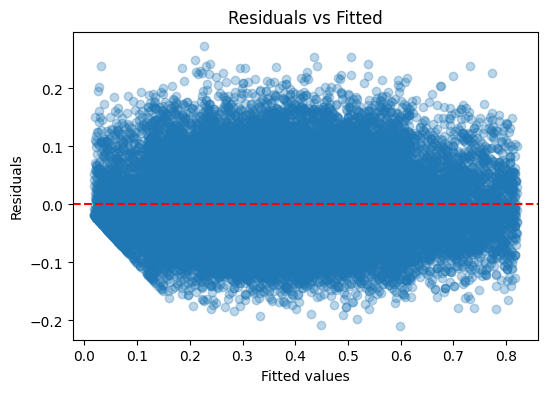

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


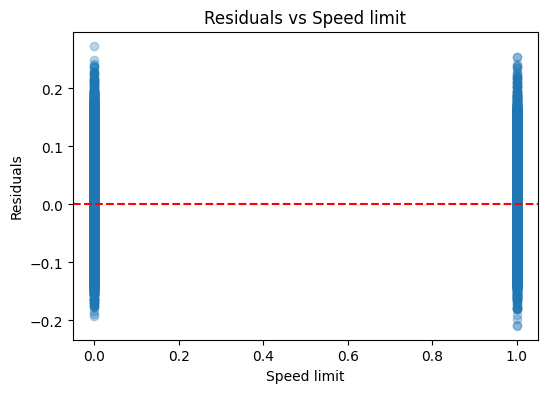

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test["high_speed"], residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Speed limit")
plt.ylabel("Residuals")
plt.title("Residuals vs Speed limit")
plt.show()


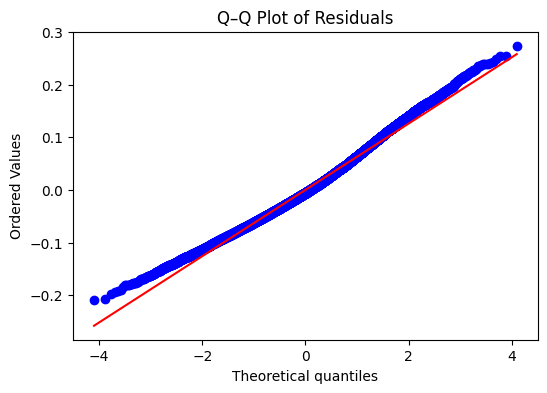

In [ ]:
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()


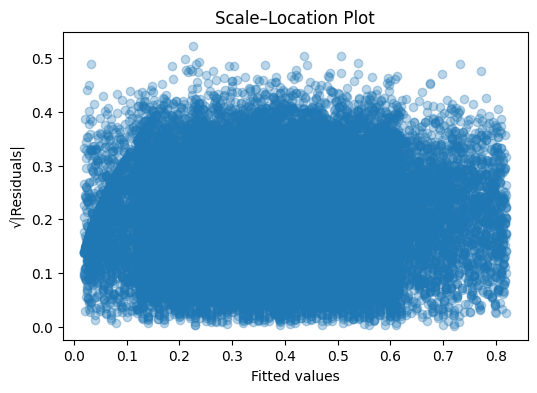

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, np.sqrt(np.abs(residuals)), alpha=0.3)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale–Location Plot")
plt.show()


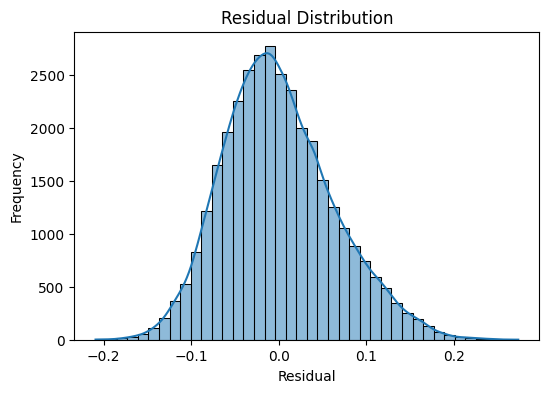

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [ ]:


pd.DataFrame({
    "residual": residuals,
    "high_speed": X_test_enc["high_speed"]
}).groupby("high_speed").describe()


residual                                                    \
              count      mean       std       min       25%       50%   
high_speed                                                              
False       20155.0  0.000638  0.062942 -0.193061 -0.043540 -0.005228   
True        13434.0 -0.001235  0.063570 -0.209177 -0.046098 -0.006787   

                                
                 75%       max  
high_speed                      
False       0.040253  0.273621  
True        0.038165  0.253683

<Axes: xlabel='accident_risk', ylabel='Count'>

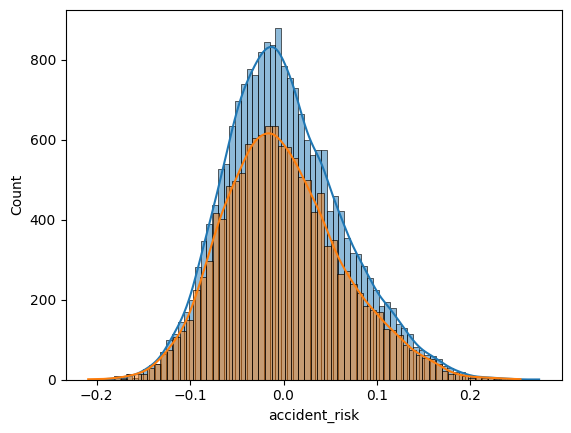

In [ ]:
sns.histplot(residuals[X_test_enc["high_speed"] == 0], label="low speed", kde=True)
sns.histplot(residuals[X_test_enc["high_speed"] == 1], label="high speed", kde=True)


In [ ]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78372 entries, 80965 to 15795
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_lanes              78372 non-null  int64  
 1   curvature              78372 non-null  float64
 2   road_signs_present     78372 non-null  bool   
 3   public_road            78372 non-null  bool   
 4   holiday                78372 non-null  bool   
 5   school_season          78372 non-null  bool   
 6   high_speed             78372 non-null  bool   
 7   road_type_highway      78372 non-null  bool   
 8   road_type_rural        78372 non-null  bool   
 9   lighting_dim           78372 non-null  bool   
 10  lighting_night         78372 non-null  bool   
 11  weather_foggy          78372 non-null  bool   
 12  weather_rainy          78372 non-null  bool   
 13  time_of_day_afternoon  78372 non-null  bool   
 14  time_of_day_evening    78372 non-null  bool   
dtypes: 

In [ ]:
X_train_enc.head(10)

,num_lanes,curvature,road_signs_present,public_road,holiday,school_season,high_speed,road_type_highway,road_type_rural,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening
80965,2,0.69,True,True,False,True,False,False,True,False,False,False,False,True,False
73776,1,0.97,False,True,False,True,False,False,False,False,True,False,False,False,False
22848,3,0.31,False,True,True,False,False,True,False,True,False,True,False,False,False
31456,3,0.74,True,False,True,False,False,True,False,False,True,False,False,True,False
19772,3,0.86,True,False,True,False,True,False,False,False,False,False,True,True,False
77587,3,0.57,False,True,True,False,False,False,False,False,True,False,True,False,False
64063,3,0.95,False,False,True,True,True,False,False,True,False,False,True,False,False
66122,2,0.97,False,True,True,True,True,False,False,True,False,False,True,True,False
92821,2,0.48,False,True,True,False,False,True,False,False,False,True,False,True,False
32240,3,0.80,False,True,False,True,False,False,False,True,False,False,True,False,True


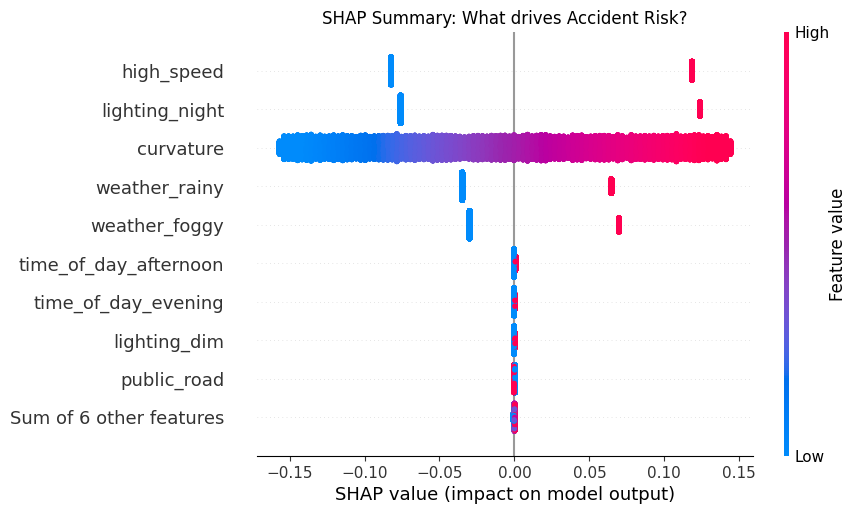

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- THE FIX: Convert data to simple floats ---
# SHAP sometimes crashes on Booleans or Sparse matrices.
# We create temporary variables just for the SHAP calculator.
X_train_shap = X_train_enc.astype(float)
X_test_shap = X_test_enc.astype(float)

# 1. Initialize the Explainer
# Use the new float data
explainer = shap.LinearExplainer(lr, X_train_shap)

# 2. Calculate SHAP values
shap_values = explainer(X_test_shap)

# 3. Plot
plt.figure()
plt.title("SHAP Summary: What drives Accident Risk?")
shap.plots.beeswarm(shap_values, max_display=10)

In [ ]:
X_train_enc_int = X_train_enc.copy()
X_test_enc_int = X_test_enc.copy()

In [ ]:
X_train_enc_int["rain_holiday"] = X_train_enc_int["weather_rainy"] * X_train_enc_int["holiday"]
X_train_enc_int["rain_school"] = X_train_enc_int["weather_rainy"] * X_train_enc_int["holiday"]
#X_train_enc_int["Speed_curve"] = X_train_enc_int["high_speed"] * X_train_enc_int["curvature"]

In [ ]:
X_test_enc_int["rain_holiday"] = X_test_enc_int["weather_rainy"] * X_test_enc_int["holiday"]
X_test_enc_int["rain_school"] = X_test_enc_int["weather_rainy"] * X_test_enc_int["holiday"]
#X_test_enc_int["Speed_curve"] = X_test_enc_int["high_speed"] * X_test_enc_int["curvature"]

#Linear Regression with interaction terms

In [ ]:

lr_int = LinearRegression()
lr_int.fit(X_train_enc_int, y_train)

y_pred_lr_int = lr_int.predict(X_test_enc_int)

mae_lr_int = mean_absolute_error(y_test, y_pred_lr_int)
rmse_lr_int = np.sqrt(mean_squared_error(y_test, y_pred_lr_int))
r2_lr_int = r2_score(y_test, y_pred_lr_int)

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals
residuals_int = y_test - y_pred_lr_int

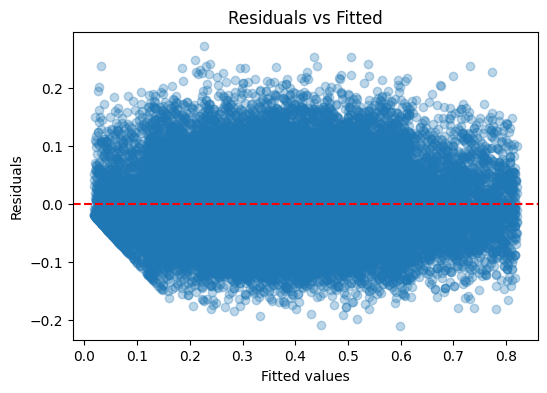

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr_int, residuals_int, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


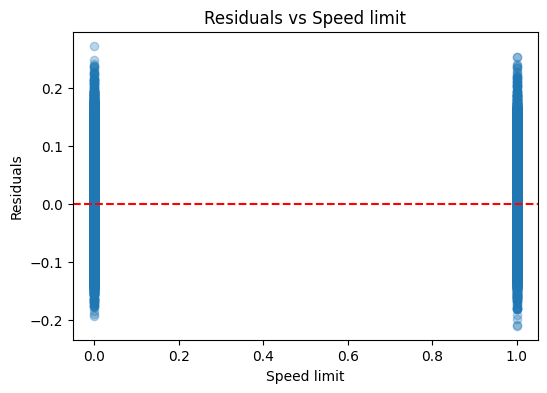

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test_enc["high_speed"], residuals_int, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Speed limit")
plt.ylabel("Residuals")
plt.title("Residuals vs Speed limit")
plt.show()


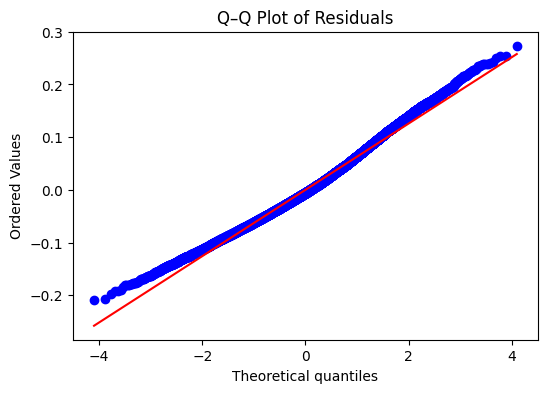

In [ ]:
plt.figure(figsize=(6,4))
stats.probplot(residuals_int, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()


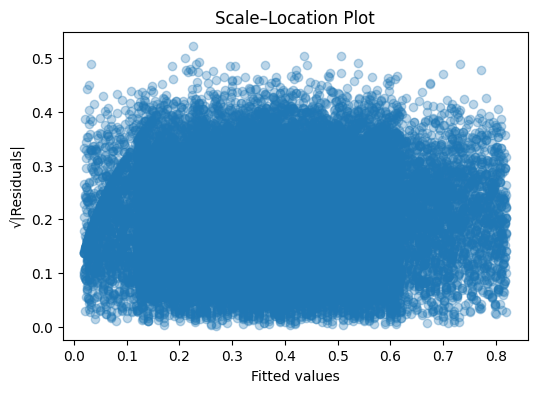

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr_int, np.sqrt(np.abs(residuals_int)), alpha=0.3)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale–Location Plot")
plt.show()


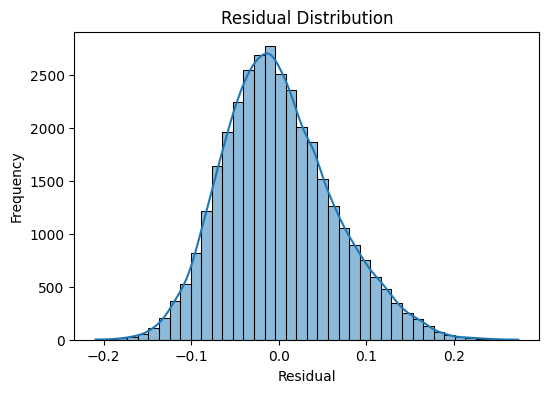

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuals_int, bins=40, kde=True)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [ ]:
import pandas as pd

lr_metrics = {
    'Metric': ['MAE', 'RMSE', 'R2 Score'],
    'Linear Value': [mae_lr, rmse_lr, r2_lr],
    'Linear with interaction': [mae_lr_int, rmse_lr_int, r2_lr_int],
}
lr_metrics_df = pd.DataFrame(lr_metrics)
print(lr_metrics_df)


     Metric  Linear Value  Linear with interaction
0       MAE      0.050216                 0.050216
1      RMSE      0.063199                 0.063199
2  R2 Score      0.874016                 0.874013


#Lasso Regression

**Since we don't have a multicollinearity problem and from the eda we found some features to not have much of an influence on the accident_risk, we are trying lasso regression**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV


In [ ]:
lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(
        alphas=None,
        cv=5,
        max_iter=10000,
        random_state=42
    ))
])

lasso.fit(X_train_enc, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', LassoCV(cv=5, max_iter=10000, random_state=42))])

In [ ]:
y_pred_lasso = lasso.predict(X_test_enc)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)


In [ ]:
import pandas as pd

lasso_metrics = {
    'Metric': ['MAE', 'RMSE', 'R2 Score'],
    'Lasso Value': [mae_lasso, rmse_lasso, r2_lasso],
    'Linear Value': [mae_lr, rmse_lr, r2_lr],
    'Linear Value with interactions': [mae_lr_int, rmse_lr_int, r2_lr_int]
}
lasso_metrics_df = pd.DataFrame(lasso_metrics)
print(lasso_metrics_df.to_markdown(index=False))

| Metric   |   Lasso Value |   Linear Value |   Linear Value with interactions |
|:---------|--------------:|---------------:|---------------------------------:|
| MAE      |     0.0502144 |      0.0502157 |                        0.0502164 |
| RMSE     |     0.0631991 |      0.0631988 |                        0.0631994 |
| R2 Score |     0.874014  |      0.874016  |                        0.874013  |


In [ ]:
coef = lasso.named_steps["lasso"].coef_
feature_names = X_train_enc.columns

selected = feature_names[coef != 0]
len(selected), selected


(7,
 Index(['curvature', 'public_road', 'high_speed', 'lighting_night',
        'weather_foggy', 'weather_rainy', 'time_of_day_afternoon'],
       dtype='object'))

In [ ]:
lasso_coefs = lasso.named_steps["lasso"].coef_


In [ ]:
import pandas as pd

# 1. Get feature names for Lasso model (15 columns at the time of fitting)
# This list is reconstructed from the notebook state just before Lasso training.
lasso_feature_names = [
    'num_lanes', 'curvature', 'road_signs_present', 'public_road', 'holiday',
    'school_season', 'high_speed', 'road_type_highway', 'road_type_rural',
    'lighting_dim', 'lighting_night', 'weather_foggy', 'weather_rainy',
    'time_of_day_afternoon', 'time_of_day_evening'
]

# 2. Get feature names for Linear Regression with interactions (17 columns)
# This is the most comprehensive list of features including interaction terms.
linear_int_feature_names = X_train_enc_int.columns.tolist()

# 3. Create a Series for Lasso coefficients, indexed by lasso_feature_names
lasso_coefs_series = pd.Series(lasso.named_steps["lasso"].coef_, index=lasso_feature_names)

# 4. Reindex Lasso coefficients to align with linear_int_feature_names,
#    filling NaN with 0 for features (like interaction terms) not present in Lasso's original training set.
aligned_lasso_coefs = lasso_coefs_series.reindex(linear_int_feature_names, fill_value=0).values

# Now all arrays should have the same length (17)
coef_df = pd.DataFrame({
    "Feature": linear_int_feature_names, # Use the most comprehensive list of features
    "Linear": lr_int.coef_,
    "Lasso": aligned_lasso_coefs
})

# Optional: sort by absolute Lasso coefficients
coef_df["abs_Lasso"] = coef_df["Lasso"].abs()
coef_df = coef_df.sort_values(by="abs_Lasso", ascending=False)
coef_df.drop(columns="abs_Lasso", inplace=True)
coef_df

,Feature,Linear,Lasso
6,high_speed,0.200802,0.098238
10,lighting_night,0.199705,0.093825
1,curvature,0.300850,0.086533
11,weather_foggy,0.099644,0.046540
12,weather_rainy,0.099719,0.046361
13,time_of_day_afternoon,0.000930,0.000091
3,public_road,-0.000492,-0.000037
0,num_lanes,0.000175,0.000000
2,road_signs_present,-0.000039,-0.000000
8,road_type_rural,-0.000003,0.000000


In [ ]:
# -----------------------------
# 4️⃣ Metrics Table
# -----------------------------
metrics_df = pd.DataFrame({
    "Model": ["Linear Regression","Linear Regression (interactions)", "Lasso Regression (Interactions)"],
    "MAE": [mae_lr,mae_lr_int, mae_lasso],
    "RMSE": [rmse_lr,rmse_lr_int, rmse_lasso],
    "R2 Score": [r2_lr,r2_lr_int, r2_lasso]
})
print("📊 Model Performance Metrics:")
display(metrics_df)

📊 Model Performance Metrics:


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.050216,0.063199,0.874016
1,Linear Regression (interactions),0.050216,0.063199,0.874013
2,Lasso Regression (Interactions),0.050214,0.063199,0.874014


In [ ]:
# -----------------------------
# 6️⃣ Lasso Coefficients Table
# -----------------------------
lasso_coefs = lasso.named_steps["lasso"].coef_
selected_mask = lasso_coefs != 0
selected_features = X_train_enc.columns[selected_mask]
selected_values = lasso_coefs[selected_mask]

lasso_table = pd.DataFrame({
    "Feature": selected_features,
    "Lasso Coef": selected_values
}).sort_values(by="Lasso Coef", key=abs, ascending=False)

print("📊 Lasso-selected Features and Coefficients:")
display(lasso_table)

📊 Lasso-selected Features and Coefficients:


,Feature,Lasso Coef
2,high_speed,0.098238
3,lighting_night,0.093825
0,curvature,0.086533
4,weather_foggy,0.046540
5,weather_rainy,0.046361
6,time_of_day_afternoon,0.000091
1,public_road,-0.000037


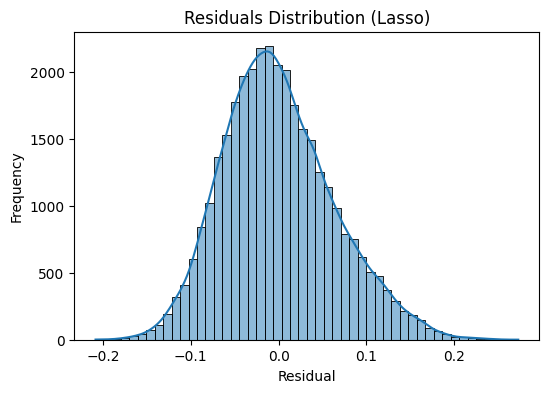

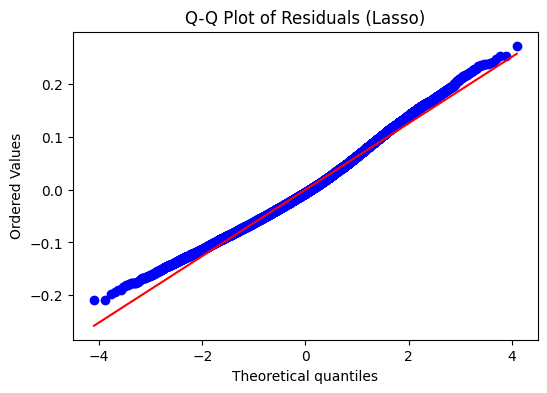

📝 Interpretation Summary:
- Lasso shrunk irrelevant features and interactions to zero, keeping 7 significant predictors.
- Strong predictors include curvature, high_speed, lighting at night, and adverse weather conditions (foggy/rainy).
- Weak interactions such as rain_holiday, rain_school were dropped.
- Metrics (MAE, RMSE, R²) show model explains ~87% of variance in accident risk.
- Residuals are roughly normal, suggesting linear assumptions are reasonable.


In [ ]:
# -----------------------------
# 6️⃣ Residual Analysis (sanity check)
# -----------------------------
residuals_lasso = y_test - y_pred_lasso

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(residuals_lasso, kde=True, bins=50)
plt.title("Residuals Distribution (Lasso)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
plt.figure(figsize=(6,4))
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Lasso)")
plt.show()

# -----------------------------
# 7️⃣ Brief Interpretation
# -----------------------------
print("📝 Interpretation Summary:")
print(f"- Lasso shrunk irrelevant features and interactions to zero, keeping {len(selected_features)} significant predictors.")
print("- Strong predictors include curvature, high_speed, lighting at night, and adverse weather conditions (foggy/rainy).")
print("- Weak interactions such as rain_holiday, rain_school were dropped.")
print("- Metrics (MAE, RMSE, R²) show model explains ~87% of variance in accident risk.")
print("- Residuals are roughly normal, suggesting linear assumptions are reasonable.")

In [ ]:
# -----------------------------
# 6️⃣ Interactions Analysis
# -----------------------------
interaction_cols = [c for c in X_train_enc.columns if "rain_" in c or "curvature_" in c]
interactions_selected = [c for c in interaction_cols if c in selected_features]
interactions_removed = [c for c in interaction_cols if c not in selected_features]

print("📝 Interactions Summary:")
print(f"- Interactions kept in Lasso: {interactions_selected}")
print(f"- Interactions removed by Lasso: {interactions_removed}")


📝 Interactions Summary:
- Interactions kept in Lasso: []
- Interactions removed by Lasso: []


In [ ]:
# -----------------------------
# 7️⃣ Feature Stability via Repeated LassoCV
# -----------------------------

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

selected_counts = pd.Series(0, index=X_train_enc.columns)

# Get the optimal alpha from the previously fitted LassoCV pipeline
# The 'lasso' variable here refers to the Pipeline from cell bBkgKtRAJtGk
optimal_alpha = lasso.named_steps["lasso"].alpha_

for train_idx, val_idx in rkf.split(X_train_enc):
    X_tr, X_val = X_train_enc.iloc[train_idx], X_train_enc.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_tr_s = scaler.fit_transform(X_tr)
    X_val_s = scaler.transform(X_val)

    # Use the optimal_alpha to initialize a new Lasso model
    # Use a different variable name to avoid confusion with the Pipeline object
    lasso_model_in_loop = Lasso(alpha=optimal_alpha)
    lasso_model_in_loop.fit(X_tr_s, y_tr)

    selected_counts += (lasso_model_in_loop.coef_ != 0)

selected_counts.sort_values(ascending=False)

,0
curvature,50
high_speed,50
lighting_night,50
weather_foggy,50
weather_rainy,50
time_of_day_afternoon,41
public_road,29
num_lanes,22
school_season,11
time_of_day_evening,8


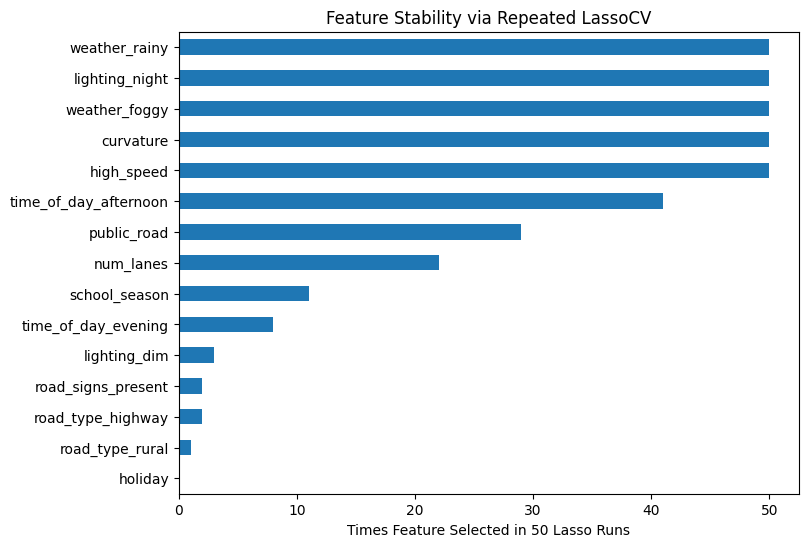

In [ ]:
import matplotlib.pyplot as plt

selected_counts.sort_values(ascending=True).plot(kind="barh", figsize=(8,6))
plt.xlabel("Times Feature Selected in 50 Lasso Runs")
plt.title("Feature Stability via Repeated LassoCV")
plt.show()

**Repeated LassoCV was used to assess feature stability. curvature, high_speed, lighting_night, weather_rainy, and weather_foggy were selected in all 50 splits, making them robust predictors. Features like time_of_day_morning and public_road were sometimes selected, indicating weaker contributions. Interactions such as rain_holiday and rain_school were almost never selected, suggesting they do not improve predictive power.**

#Ridge Regression

In [ ]:
X_train_r = X_train_enc.copy()
X_test_r = X_test_enc.copy()

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Create a Pipeline (Scaler + Ridge)
# RidgeCV will try alphas: 0.1, 1.0, 10.0 (Low, Medium, High penalty)
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0]))
])

# 2. Fit
ridge_pipeline.fit(X_train_r, y_train)

# 3. Predict & Score
y_pred_ridge = ridge_pipeline.predict(X_test_r)

# 4. Metrics
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge R2:   {r2_ridge:.5f}")
print(f"Ridge MAE: {mae_ridge:.5f}")
print(f"Ridge RMSE: {rmse_ridge:.5f}")

# Check which alpha it chose (Higher = More regularization)
print(f"Best Alpha: {ridge_pipeline.named_steps['model'].alpha_}")

Ridge R2:   0.87402
Ridge MSE: 0.05022
Ridge RMSE: 0.06320
Best Alpha: 1.0


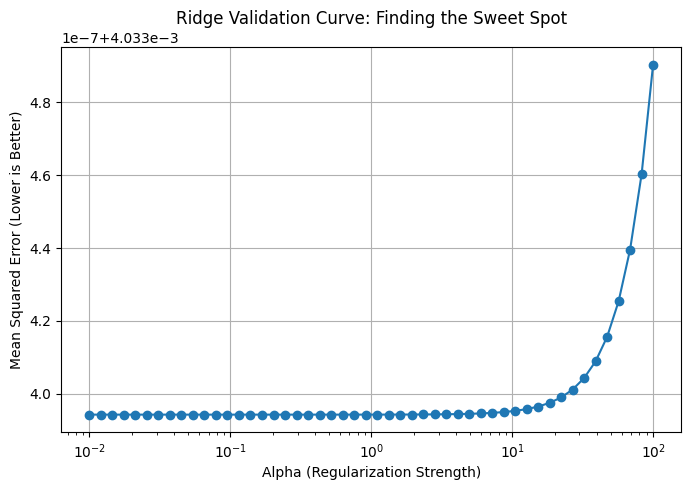

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Define range of Alphas to test (Log scale is standard for Ridge)
alphas = np.logspace(-2, 2, 50) # 0.01 to 100
scores = []

# 2. Loop through alphas manually to capture scores for plotting
for alpha in alphas:
    # Build pipeline for this specific alpha
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])

    # Get CV score (Neg MSE because higher is better in sklearn scoring)
    cv_score = cross_val_score(pipe, X_train_r, y_train, cv=5, scoring='neg_mean_squared_error')
    scores.append(-np.mean(cv_score)) # Convert back to positive MSE

# 3. Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, scores, marker='o', linestyle='-')
plt.xscale('log') # Log scale is easier to read
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (Lower is Better)')
plt.title('Ridge Validation Curve: Finding the Sweet Spot')
plt.grid(True)
plt.show()

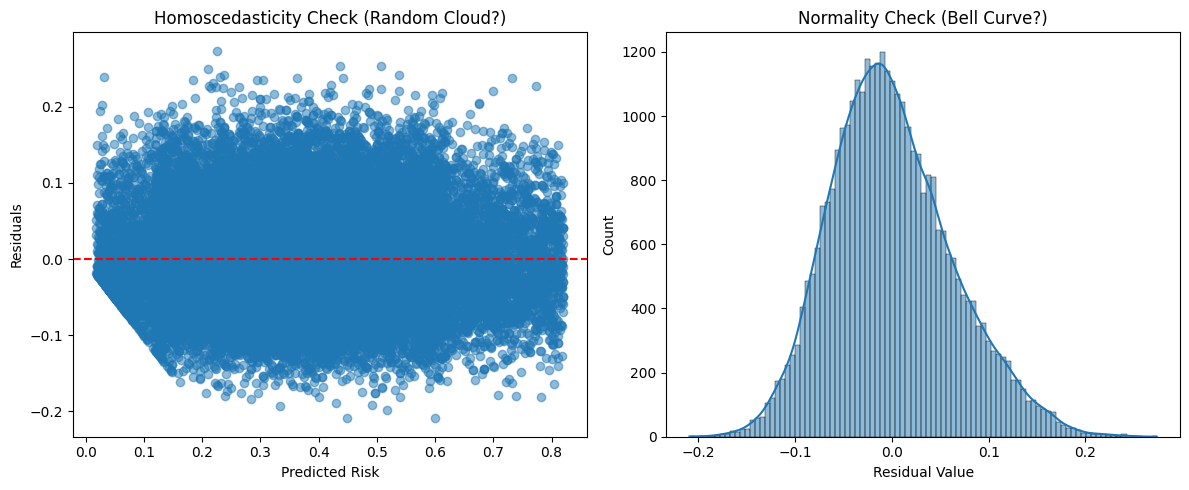

In [ ]:
import seaborn as sns

# 1. Predict (make sure you use the fitted pipeline from previous step)
# Assuming 'ridge_pipeline' is your fitted model
y_pred_ridge = ridge_pipeline.predict(X_test_r)
residuals = y_test - y_pred_ridge

# 2. Plot Residuals
plt.figure(figsize=(12, 5))

# Scatter: Predictions vs Errors
plt.subplot(1, 2, 1)
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Risk")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check (Random Cloud?)")

# Histogram: Error Distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel("Residual Value")
plt.title("Normality Check (Bell Curve?)")

plt.tight_layout()
plt.show()

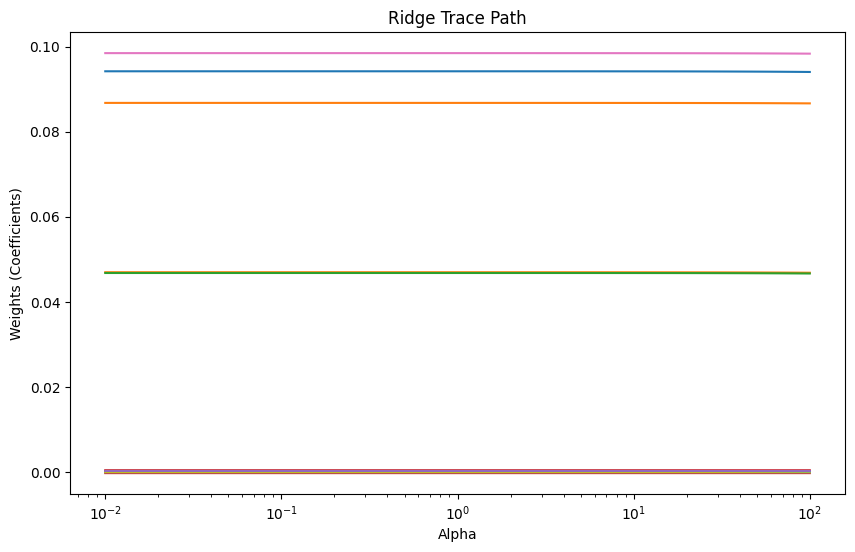

In [ ]:
# 1. Collect coefficients for different alphas
coefs = []
for a in alphas:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=a))
    ])
    pipe.fit(X_train_r, y_train)
    coefs.append(pipe.named_steps['ridge'].coef_)

# 2. Plot
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

# Labeling
plt.xlabel('Alpha')
plt.ylabel('Weights (Coefficients)')
plt.title('Ridge Trace Path')
plt.axis('tight')

# Add legend (optional, might be crowded if many features)
# plt.legend(X_train_r.columns, loc='best')
plt.show()

#ElasticNet Regression

In [ ]:
X_train_e = X_train_enc.copy()
X_test_e = X_test_enc.copy()

In [ ]:
from sklearn.linear_model import ElasticNetCV

# 1. Create Pipeline
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNetCV(
        l1_ratio=[0.1, 0.5, 0.9], # Try different mixes
        alphas=[0.01, 0.1, 1.0, 10.0],
        cv=5 # 5-fold cross-validation
    ))
])

# 2. Fit
elastic_pipeline.fit(X_train_e, y_train)

# 3. Predict & Score
y_pred_elastic = elastic_pipeline.predict(X_test_e)

r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

print(f"ElasticNet R2:   {r2_elastic:.5f}")
print(f"ElasticNet MAE: {mae_elastic:.5f}")
print(f"ElasticNet RMSE: {rmse_elastic:.5f}")

# Check what it chose
print(f"Best Alpha:    {elastic_pipeline.named_steps['model'].alpha_}")
print(f"Best L1 Ratio: {elastic_pipeline.named_steps['model'].l1_ratio_}")

ElasticNet R2:   0.87366
ElasticNet MAE: 0.05029
ElasticNet RMSE: 0.06329
Best Alpha:    0.01
Best L1 Ratio: 0.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Setup the Pipeline
# We test different "mixes".
# 0.1 = Mostly Ridge, 0.9 = Mostly Lasso, 1.0 = Pure Lasso
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]

elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNetCV(l1_ratio=l1_ratios, cv=5, random_state=42))
])

# 2. Fit (This runs the heavy Grid Search automatically)
print("Training ElasticNet (this might take a moment)...")
elastic_pipeline.fit(X_train_e, y_train) # Using y_train instead of y

# 3. Get the Best Params
best_model = elastic_pipeline.named_steps['model']
print(f"Best Alpha:   {best_model.alpha_:.5f}")
print(f"Best L1 Ratio: {best_model.l1_ratio_}")

Training ElasticNet (this might take a moment)...
Best Alpha:   0.00021
Best L1 Ratio: 1.0


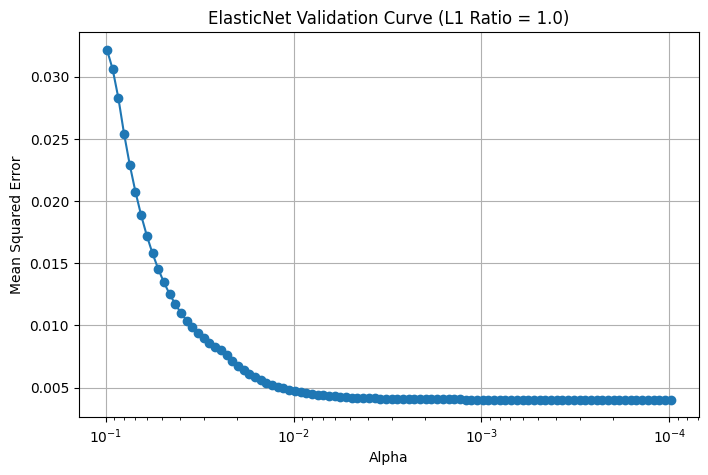

In [ ]:
# Extract the results from the fitted model
# mse_path_ shape is (n_l1_ratios, n_alphas, n_folds)
# We need to find the index of the best L1 Ratio to plot just that curve
best_l1_index = l1_ratios.index(best_model.l1_ratio_)

# Get the alphas and errors for the winning mix
alphas_tested = best_model.alphas_[best_l1_index]
mse_per_alpha = np.mean(best_model.mse_path_[best_l1_index], axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas_tested, mse_per_alpha, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title(f'ElasticNet Validation Curve (L1 Ratio = {best_model.l1_ratio_})')
plt.grid(True)
plt.gca().invert_xaxis() # Usually sklearn sorts alphas high-to-low, so we flip X
plt.show()

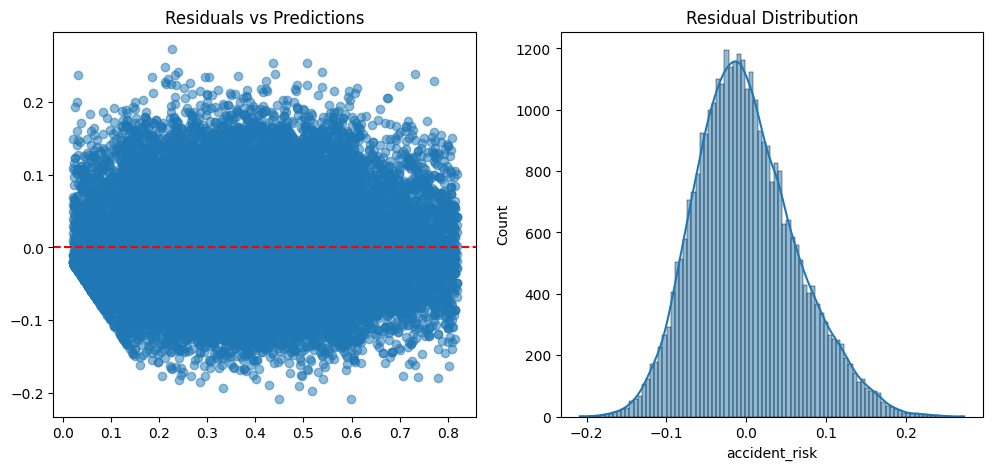

In [ ]:
import seaborn as sns

# Predict
y_pred_en = elastic_pipeline.predict(X_test_enc) # Make sure to use test set here
residuals_en = y_test - y_pred_en

# Plot
plt.figure(figsize=(12, 5))

# Scatter
plt.subplot(1, 2, 1)
plt.scatter(y_pred_en, residuals_en, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals_en, kde=True)
plt.title("Residual Distribution")
plt.show()

In [ ]:
import pandas as pd

# Extract coefficients
coefs_en = pd.DataFrame({
    'Feature': X_train_e.columns,
    'Weight': best_model.coef_
})
coefs_en['Abs_Weight'] = coefs_en['Weight'].abs()

# Show the survivors (Weight > 0)
print("--- Features Kept by ElasticNet ---")
print(coefs_en[coefs_en['Abs_Weight'] > 0.0001].sort_values('Abs_Weight', ascending=False))

# Show the deleted ones (Weight approx 0)
print("\n--- Features Deleted (Zeroed Out) ---")
print(coefs_en[coefs_en['Abs_Weight'] <= 0.0001]['Feature'].tolist())

--- Features Kept by ElasticNet ---
           Feature    Weight  Abs_Weight
6       high_speed  0.098238    0.098238
10  lighting_night  0.093825    0.093825
1        curvature  0.086533    0.086533
11   weather_foggy  0.046540    0.046540
12   weather_rainy  0.046361    0.046361

--- Features Deleted (Zeroed Out) ---
['num_lanes', 'road_signs_present', 'public_road', 'holiday', 'school_season', 'road_type_highway', 'road_type_rural', 'lighting_dim', 'time_of_day_afternoon', 'time_of_day_evening']


#Random Forest

In [ ]:
X_train_rf_enc = X_train_enc.copy()
X_test_rf_enc = X_test_enc.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_rf_enc, y_train)

y_pred_rf = rf.predict(X_test_rf_enc)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(0.05422718892437, np.float64(0.06806234643312134), 0.8538788827216903)

In [ ]:
from sklearn.inspection import permutation_importance

# NOTE: To avoid Out of Memory (OOM) errors, especially in Colab's free tier,
# reduce 'n_repeats' and/or 'n_jobs'.
# Setting n_jobs=1 will use only one CPU core and significantly reduce memory usage.
perm = permutation_importance(
    rf,
    X_test_rf_enc,
    y_test,
    n_repeats=5,  # Reduced from 5 to 1 to save memory
    random_state=42,
    n_jobs=1      # Reduced from -1 to 1 to save memory
)

imp_df = pd.DataFrame({
    "Feature": X_test_rf_enc.columns,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False)

imp_df.head(10)

,Feature,Importance
6,high_speed,0.603676
10,lighting_night,0.556915
1,curvature,0.473359
12,weather_rainy,0.105280
11,weather_foggy,0.103305
4,holiday,0.000745
0,num_lanes,-0.000015
3,public_road,-0.000189
2,road_signs_present,-0.000273
9,lighting_dim,-0.000391


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", 0.5]
}

rf_tuned = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=5,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train_rf_enc, y_train)


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 0.5],
                                        'min_samples_leaf': [1, 5, 10],
                                        'n_estimators': [300, 500]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
X_train_cb = X_train.copy()
X_test_cb = X_test.copy()

In [ ]:
cat_cols

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [ ]:
# 1. Fix Boolean types
bool_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season', 'high_speed']
X_train_cb[bool_cols] = X_train_cb[bool_cols].astype(int)
X_test_cb[bool_cols] = X_test_cb[bool_cols].astype(int)


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 3. Split data (assuming you have train_test_split imported)
# X_train_cb, X_test_cb, y_train, y_test = train_test_split(X, y, ...)

# 4. Run CatBoost (Your code remains the same!)
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

cat_model.fit(
    X_train_cb,
    y_train,
    # Only the string columns go here
    cat_features=['road_type', 'lighting', 'weather', 'time_of_day']
)

y_pred_cb = cat_model.predict(X_test_cb)

mae_cb = mean_absolute_error(y_test, y_pred_cb)
rmse_cb = np.sqrt(mean_squared_error(y_test, y_pred_cb))
r2_cb = r2_score(y_test, y_pred_cb)

mae_cb, rmse_cb, r2_cb


(0.05024973649142907, np.float64(0.06322755868492232), 0.8739009030144097)

In [ ]:
mae_rf = 0.05422718892437
rmse_rf = 0.06806234643312134
r2_rf = 0.8538788827216903

In [ ]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Linear + interactions",
        "Lasso",
        "Random Forest",
        "CatBoost"
    ],
    "MAE": [
        mae_lr,
        mae_lr_int,
        mae_lasso,
        mae_rf,
        mae_cb
    ],
    "RMSE": [
        rmse_lr,
        rmse_lr_int,
        rmse_lasso,
        rmse_rf,
        rmse_cb
    ],
    "R2": [
        r2_lr,
        r2_lr_int,
        r2_lasso,
        r2_rf,
        r2_cb
    ]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,0.050216,0.063199,0.874016
1,Linear + interactions,0.050216,0.063199,0.874013
2,Lasso,0.050214,0.063199,0.874014
3,Random Forest,0.054227,0.068062,0.853879
4,CatBoost,0.050250,0.063228,0.873901


#XGBoost

In [ ]:
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

In [ ]:
# 1. Prepare Data (Reuse your LightGBM preparation)
# Convert Booleans to Int
bool_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season', 'high_speed']

X_train_xgb[bool_cols] = X_train_xgb[bool_cols].astype(int)
X_test_xgb[bool_cols] = X_test_xgb[bool_cols].astype(int)

# Convert Strings to 'category'
cat_cols = ['road_type', 'lighting', 'weather', 'time_of_day']
for col in cat_cols:
    X_train_xgb[col] = X_train_xgb[col].astype('category')
    X_test_xgb[col] = X_test_xgb[col].astype('category')

In [ ]:
import xgboost as xgb

# 2. Define Model with Categorical Support enabled
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    enable_categorical=True,  # <--- CRITICAL LINE
    tree_method='hist',       # Required for efficient categorical support
    random_state=42
)

# 3. Fit
xgb_model.fit(X_train_xgb, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# 2. Calculate Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# 3. Print Results
print(f"XGBoost MAE:  {mae_xgb:.5f}")
print(f"XGBoost RMSE: {rmse_xgb:.5f}")
print(f"XGBoost R2:   {r2_xgb:.5f}")

XGBoost MAE:  0.05072
XGBoost RMSE: 0.06384
XGBoost R2:   0.87146


               Feature  Importance
10          high_speed    0.699982
3             lighting    0.212932
2            curvature    0.042273
4              weather    0.040837
5   road_signs_present    0.000592
0            road_type    0.000584
7          time_of_day    0.000579
9        school_season    0.000559
1            num_lanes    0.000557
8              holiday    0.000553


/tmp/ipython-input-3342077020.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


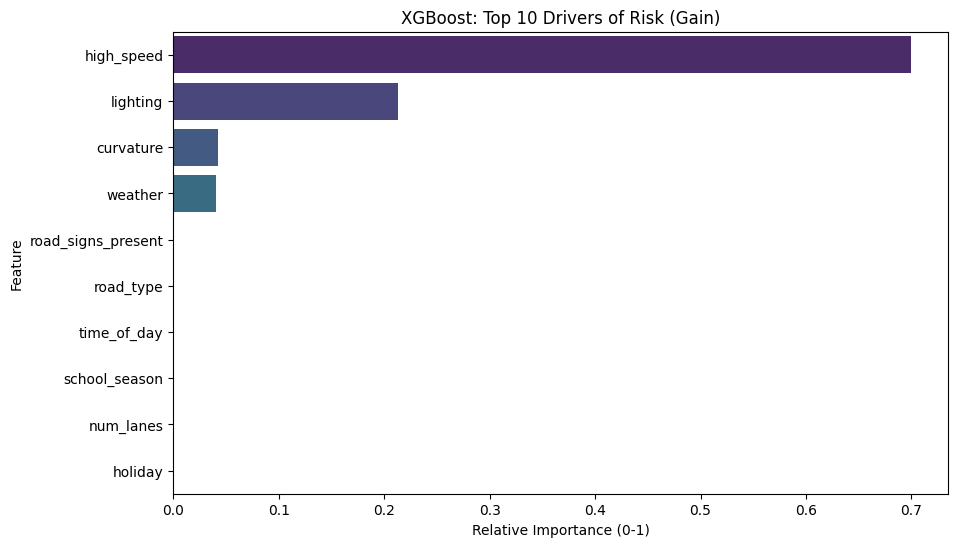

In [ ]:
import pandas as pd
import seaborn as sns

# 1. Extract feature importances
# (XGBoost stores them in the same order as your columns)
importances = pd.DataFrame({
    'Feature': X_train_xgb.columns,
    'Importance': xgb_model.feature_importances_
})

# 2. Sort them
importances = importances.sort_values(by='Importance', ascending=False)

# 3. Print the Top 10
print(importances.head(10))

# 4. Visualize nicely
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title('XGBoost: Top 10 Drivers of Risk (Gain)')
plt.xlabel('Relative Importance (0-1)')
plt.show()

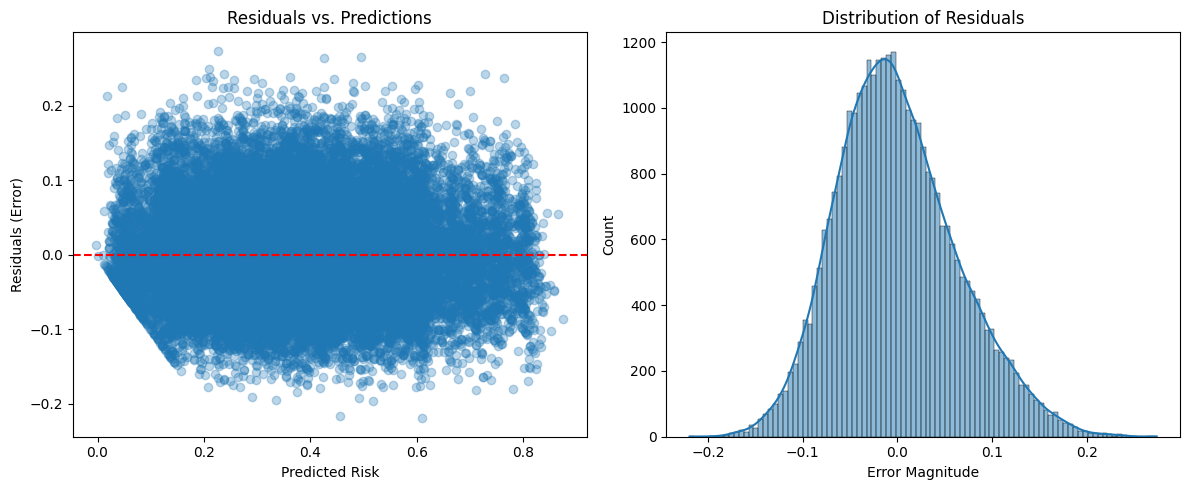

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals
residuals = y_test - y_pred_xgb

# Plot 1: Residuals vs. Predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_xgb, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Risk')
plt.ylabel('Residuals (Error)')
plt.title('Residuals vs. Predictions')

# Plot 2: Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Error Magnitude')

plt.tight_layout()
plt.show()

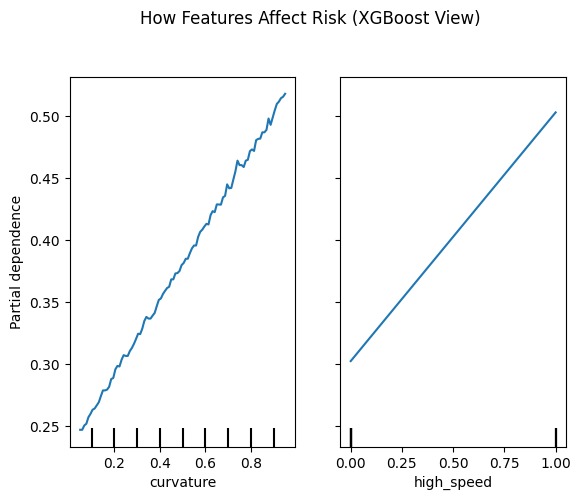

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Select your top 2 features to analyze (e.g., Curvature and Speed)
features_to_plot = ['curvature', 'high_speed']

# Note: We use the 'estimator' (model) and the 'X' data
# Ensure X_test_xgb matches the column names the model was trained on
PartialDependenceDisplay.from_estimator(
    xgb_model,
    X_test_xgb,
    features_to_plot,
    kind="average"  # Shows the average trend
)

plt.suptitle("How Features Affect Risk (XGBoost View)", y=1.02)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 1. Define the model (Base)
xgb_tuned = xgb.XGBRegressor(
    random_state=42,
    enable_categorical=True, # Keep this if using X_train_xgb
    tree_method='hist',      # Speed up training
    n_jobs=-1                # Use all CPU cores
)

# 2. Define the "Grid" of options
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],      # 3 is "simple", 7 is "complex"
    'learning_rate': [0.01, 0.1]
}

# 3. Setup the Search
grid_search = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    cv=3,                 # 3-Fold Cross Validation (robustness check)
    scoring='r2',         # Optimize for R-Squared
    verbose=1
)

# 4. Run the Search
print("Starting Grid Search...")
grid_search.fit(X_train_xgb, y_train)

# 5. Get the Winner
print(f"\nBest Params: {grid_search.best_params_}")
print(f"Best CV R2:  {grid_search.best_score_:.5f}")

# 6. Assign the best model to a variable
best_xgb = grid_search.best_estimator_

Starting Grid Search...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV R2:  0.87413


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict using the winner
y_pred_tuned = best_xgb.predict(X_test_xgb)

# Score
r2_xgb_f = r2_score(y_test, y_pred_tuned)
# Removed squared=False and applied np.sqrt() to get RMSE
mse_xgb_f = mean_squared_error(y_test, y_pred_tuned)
rmse_xgb_f = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Tuned XGBoost R2:   {r2_xgb_f:.5f}")
print(f"Tuned XGBoost MSE:  {mse_xgb_f:.5f}")
print(f"Tuned XGBoost RMSE: {rmse_xgb_f:.5f}")

Tuned XGBoost R2:   0.87347
Tuned XGBoost MSE:  0.00401
Tuned XGBoost RMSE: 0.06333


#LightBGM

In [ ]:
X_train_light = X_train.copy()
X_test_light = X_test.copy()

In [ ]:
X_train_light.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78372 entries, 80965 to 15795
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   road_type           78372 non-null  object 
 1   num_lanes           78372 non-null  int64  
 2   curvature           78372 non-null  float64
 3   lighting            78372 non-null  object 
 4   weather             78372 non-null  object 
 5   road_signs_present  78372 non-null  bool   
 6   public_road         78372 non-null  bool   
 7   time_of_day         78372 non-null  object 
 8   holiday             78372 non-null  bool   
 9   school_season       78372 non-null  bool   
 10  high_speed          78372 non-null  bool   
dtypes: bool(5), float64(1), int64(1), object(4)
memory usage: 4.6+ MB


In [ ]:
# Convert booleans to int
bool_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season', 'high_speed']
X_train_light[bool_cols] = X_train_light[bool_cols].astype(int)
X_test_light[bool_cols] = X_test_light[bool_cols].astype(int)

# Convert object/string columns to 'category'
cat_cols = ['road_type', 'lighting', 'weather', 'time_of_day']
for col in cat_cols:
    X_train_light[col] = X_train_light[col].astype('category')
    X_test_light[col] = X_test_light[col].astype('category')

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- STEP 2: RUN LIGHTGBM ---

# Initialize the model
# More aggressive model to fix Underfitting
lgbm_model = lgb.LGBMRegressor(
    n_estimators=1000,      # Give it more time to learn
    learning_rate=0.03,     # Lower rate + more trees = usually better accuracy

    # --- COMPLEXITY BOOSTERS ---
    max_depth=10,           # Deeper trees
    num_leaves=100,         # More splits per tree (Crucial for LightGBM)
    min_child_samples=10,   # Allow fitting to smaller patterns

    random_state=42,
    n_jobs=-1
)

# Fit the model
# Note: We usually don't need to specify categorical_feature='auto'
# if the columns are already dtype="category", LightGBM detects them automatically.
lgbm_model.fit(
    X_train_light,
    y_train,
    categorical_feature=cat_cols # 'auto' detects the category columns we made earlier
)

# --- STEP 3: EVALUATE ---

y_pred_lgbm = lgbm_model.predict(X_test_light)

mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"MAE: {mae_lgbm}")
print(f"RMSE: {rmse_lgbm}")
print(f"R2: {r2_lgbm}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 78372, number of used features: 11
[LightGBM] [Info] Start training from score 0.383162
MAE: 0.050944886856073374
RMSE: 0.06410996315312131
R2: 0.8703566620402579


In [ ]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Linear + interactions",
        "Ridge",
        "Lasso",
        "Elastic",
        "Random Forest",
        "CatBoost",
        "XGBoost",
        "LightBGM"
    ],
    "MAE": [
        mae_lr,
        mae_lr_int,
        mae_ridge,
        mae_lasso,
        mae_elastic,
        mae_rf,
        mae_cb,
        mse_xgb_f,
        mae_lgbm
    ],
    "RMSE": [
        rmse_lr,
        rmse_lr_int,
        rmse_ridge,
        rmse_lasso,
        rmse_elastic,
        rmse_rf,
        rmse_cb,
        rmse_xgb_f,
        rmse_lgbm
    ],
    "R2": [
        r2_lr,
        r2_lr_int,
        r2_ridge,
        r2_lasso,
        r2_elastic,
        r2_rf,
        r2_cb,
        r2_xgb_f,
        r2_lgbm
    ]
})

results = results.sort_values(by='R2', ascending=False)
results

,Model,MAE,RMSE,R2
2,Ridge,0.050216,0.063199,0.874016
0,Linear Regression,0.050216,0.063199,0.874016
3,Lasso,0.050214,0.063199,0.874014
1,Linear + interactions,0.050216,0.063199,0.874013
6,CatBoost,0.050250,0.063228,0.873901
4,Elastic,0.050293,0.063289,0.873656
7,XGBoost,0.004011,0.063334,0.873475
8,LightBGM,0.050945,0.064110,0.870357
5,Random Forest,0.054227,0.068062,0.853879


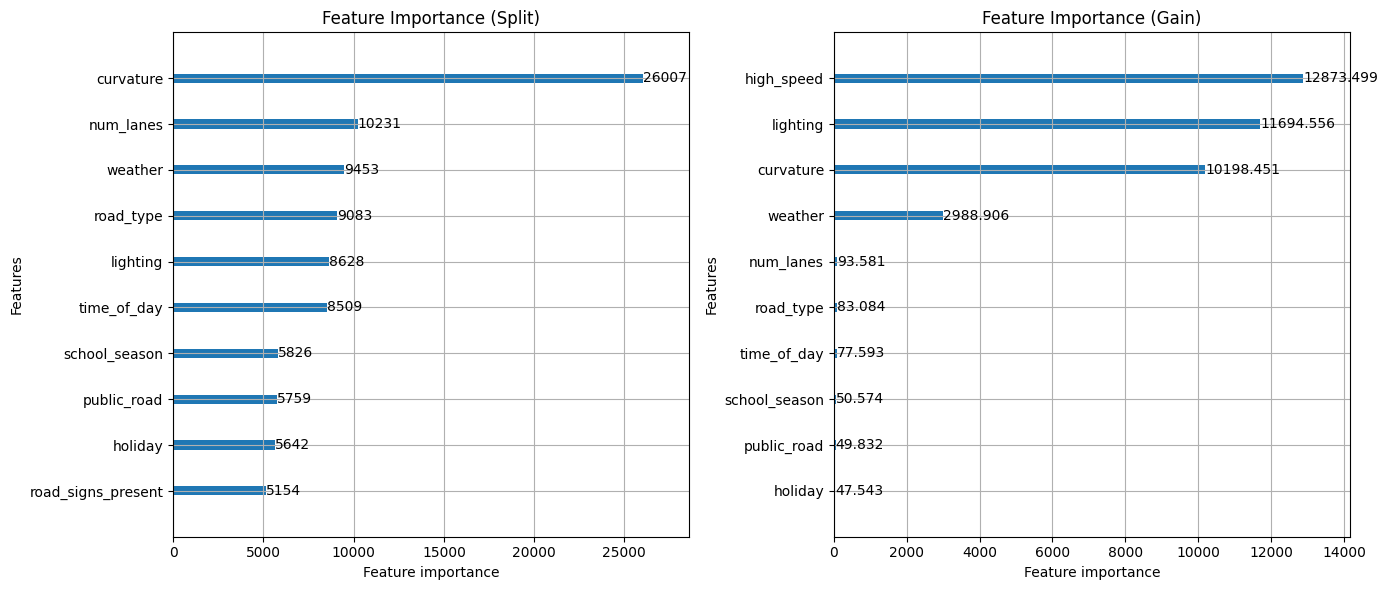

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# 1. Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 2. Plot Split Importance on the first axis (axs[0])
lgb.plot_importance(
    lgbm_model,
    max_num_features=10,
    importance_type='split',
    title='Feature Importance (Split)',
    ax=axs[0]  # <--- This is the key fix
)

# 3. Plot Gain Importance on the second axis (axs[1])
lgb.plot_importance(
    lgbm_model,
    max_num_features=10,
    importance_type='gain',
    title='Feature Importance (Gain)',
    ax=axs[1]  # <--- This is the key fix
)

# 4. Final layout adjustments
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 78372, number of used features: 11
[LightGBM] [Info] Start training from score 0.383162


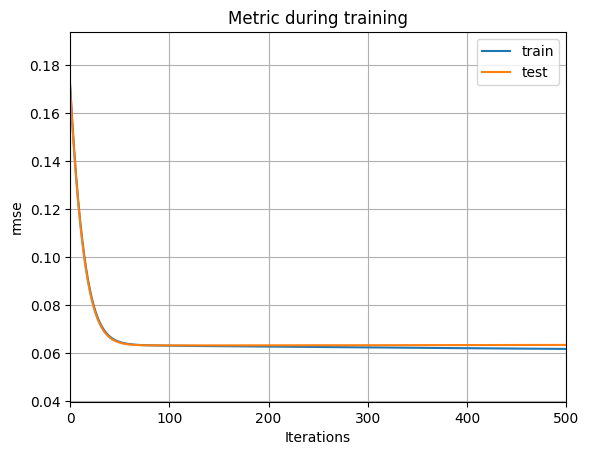

In [ ]:
# Create a dictionary to store error results
evals_result = {}

lgbm_model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05)

lgbm_model.fit(
    X_train_light, y_train,
    eval_set=[(X_train_light, y_train), (X_test_light, y_test)],
    eval_names=['train', 'test'],
    eval_metric='rmse',
    callbacks=[lgb.record_evaluation(evals_result)] # Record the errors
)

# Plotting
lgb.plot_metric(evals_result, metric='rmse')
plt.show()

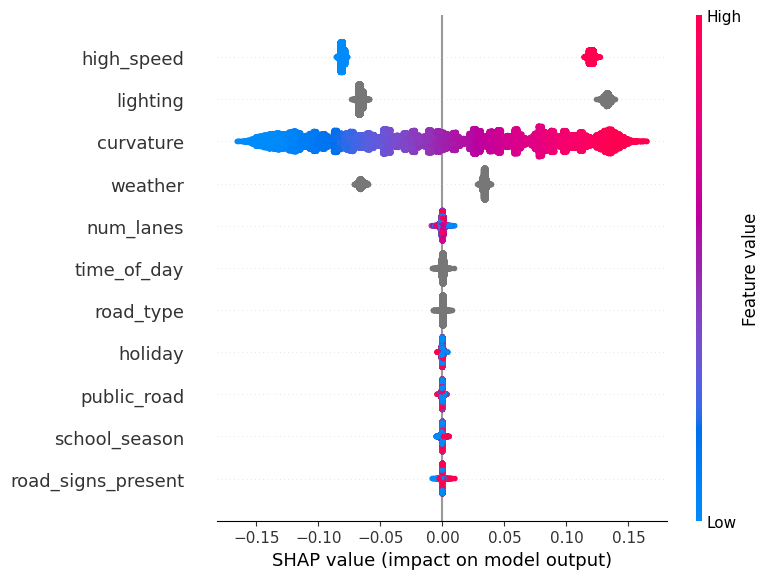

In [ ]:
import shap

# 1. Create the explainer
explainer = shap.TreeExplainer(lgbm_model)

# 2. Calculate SHAP values (might take a moment)
shap_values = explainer.shap_values(X_test_light)

# 3. Summary Plot (The best overview)
shap.summary_plot(shap_values, X_test_light)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Build a "stupid" model that just guesses the mean
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# 2. Calculate its error
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))

print(f"Baseline (Dummy) RMSE: {rmse_dummy}")
print(f"Your Model RMSE:       {rmse_lgbm}")

Baseline (Dummy) RMSE: 0.17805453703699797
Your Model RMSE:       0.06410996315312131


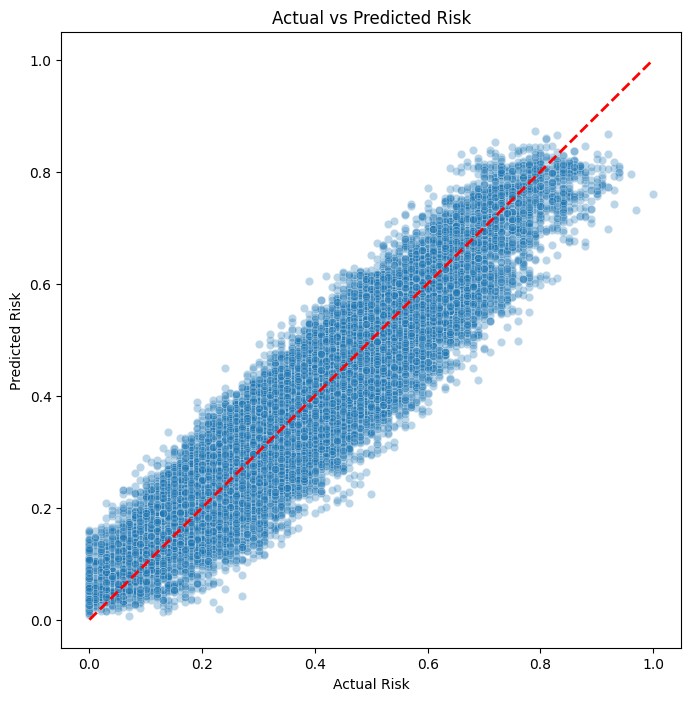

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_lgbm, alpha=0.3)

# Draw a red line for "Perfect Prediction"
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Risk")
plt.ylabel("Predicted Risk")
plt.title("Actual vs Predicted Risk")
plt.show()

#Average of catboost and lightbgm

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# --- STEP 1: Get Predictions Independently ---

# 1. Predict with CatBoost using the CatBoost-specific data (Strings)
# Make sure X_test_cb has booleans as int, but other cols as Object
pred_cat = cat_model.predict(X_test_cb)

# 2. Predict with LightGBM using the LightGBM-specific data (Categories)
# Make sure X_test_light has booleans as int, and other cols as Category
pred_lgbm = lgbm_model.predict(X_test_light)

# --- STEP 2: Average Them (The Ensemble) ---

# Simple Average (50% CatBoost, 50% LightGBM)
pred_ensemble = (pred_cat + pred_lgbm) / 2

# --- STEP 3: Check the Score ---

rmse_ensemble = np.sqrt(mean_squared_error(y_test, pred_ensemble))

print(f"CatBoost RMSE: {rmse_cb}")
print(f"LightGBM RMSE: {rmse_lgbm}")
print(f"Ensemble RMSE: {rmse_ensemble}")

CatBoost RMSE: 0.06322755868492232
LightGBM RMSE: 0.06410996315312131
Ensemble RMSE: 0.06331546248414878


In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 for your winner (CatBoost)
r2_cat = r2_score(y_test, pred_cat)

# Calculate R2 for the Ensemble
r2_ensemble = r2_score(y_test, pred_ensemble)

print(f"CatBoost R2: {r2_cat:.4f}")
print(f"Ensemble R2: {r2_ensemble:.4f}")

CatBoost R2: 0.8739
Ensemble R2: 0.8736


In [ ]:
import pandas as pd
# 1. Identify the dataframe that has the dummy columns
# (This is the variable you created right after pd.get_dummies)
# Let's assume it's called 'X_encoded' or maybe you overwrote 'df'
feature_names = X_train_enc.columns

# 2. Check if the lengths match (Debug Step)
print(f"Number of Features: {len(feature_names)}")
print(f"Number of Coefs:    {len(lr.coef_)}")

# 3. Create the dataframe
coefs = pd.DataFrame({
    'Feature': feature_names,
    'Weight': lr.coef_
})

# 4. View results
coefs['Abs_Weight'] = coefs['Weight'].abs()
print(coefs.sort_values('Abs_Weight', ascending=False).head(20))

Number of Features: 15
Number of Coefs:    15
                  Feature    Weight  Abs_Weight
1               curvature  0.300852    0.300852
6              high_speed  0.200803    0.200803
10         lighting_night  0.199707    0.199707
11          weather_foggy  0.099644    0.099644
12          weather_rainy  0.099501    0.099501
13  time_of_day_afternoon  0.000930    0.000930
9            lighting_dim  0.000602    0.000602
14    time_of_day_evening  0.000584    0.000584
3             public_road -0.000492    0.000492
5           school_season  0.000258    0.000258
0               num_lanes  0.000175    0.000175
7       road_type_highway -0.000083    0.000083
2      road_signs_present -0.000039    0.000039
4                 holiday  0.000015    0.000015
8         road_type_rural -0.000002    0.000002


In [ ]:
# Select only the features that actually matter
important_features = ['curvature', 'high_speed', 'lighting_night', 'weather_foggy', 'weather_rainy']

# Filter your training data
X_train_lean = X_train_enc[important_features] # Use your encoded/dummy dataframe
X_test_lean = X_test_enc[important_features] # Same for test

# Train a simple model
lean_model = LinearRegression()
lean_model.fit(X_train_lean, y_train)

# Check the score
print("Lean Model Score:", lean_model.score(X_test_lean, y_test))

Lean Model Score: 0.874000830529344


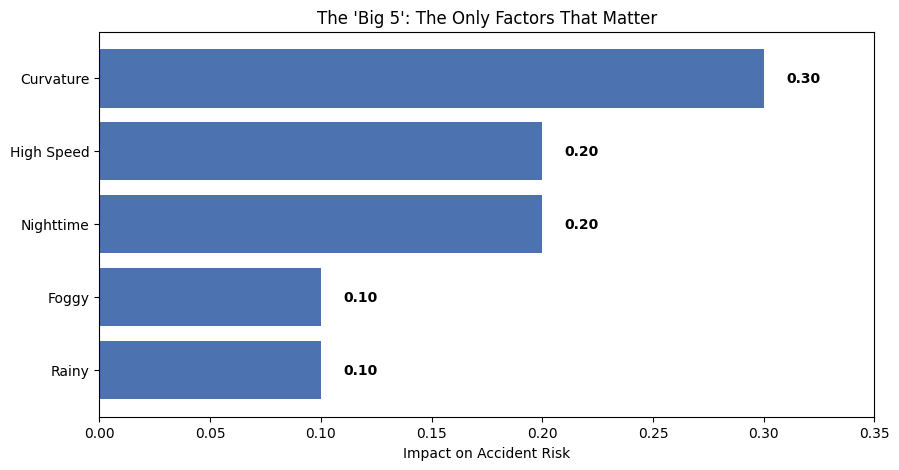

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# The data from your result
data = {
    'Factor': ['Curvature', 'High Speed', 'Nighttime', 'Foggy', 'Rainy'],
    'Impact': [0.30, 0.20, 0.20, 0.10, 0.10]
}
df_res = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(df_res['Factor'], df_res['Impact'], color='#4c72b0')

# Add the numbers on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}',
        va='center',
        fontweight='bold'
    )

plt.xlabel("Impact on Accident Risk")
plt.title("The 'Big 5': The Only Factors That Matter")
plt.xlim(0, 0.35)
plt.gca().invert_yaxis() # Put the biggest one at the top
plt.show()